# FFT and aliasing

## Section 1

我們用 $y = \sin(x)$ 和 $y = \cos(x)$ 來看看 fft 是怎麼運作的。

$\sin(x)$ 是一個週期函數，週期是 $2\pi$:

1. 我們在 $[0, 2\pi]$ 之間取 $N+1$ 個點。於是我們有 `x = range(0,stop=2*pi,length=N+1)`; 到這裡，$x$ 是一個長度為 $N+1$ 的向量，最小值是 $0$，最大值是 $2\pi$。
2. 必須注意的是 $\sin(0)$ 和 $\sin(2\pi)$ 指的是相同的點，他們都等於 $0$。所以我們要把 $x$ 向量的最後一個點去掉，即 `x = x[1:N]`;

In [1]:
using FFTW
using LinearAlgebra
using Plots

In [2]:
N = 100;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];

接著我們計算 $y = \sin(x)$ 的傅立葉係數。

1. 先求出 $\sin(x)$ 的值，並儲存在變數 fs 中。由於 x 是一個向量，因此要用 fs = sin.(x)，而不是 fs = sin(x);
2. 將 fs 轉成傅立葉係數，並儲存在 fs_hat 中。
3. 用 plot 指令畫出係數中虛部的部分。

我們稍微計算一下，根據 Euler's formula，$\sin(\theta) = \frac{e^{i\theta} - e^{-i\theta}}{2i} = \frac{1}{2}(-ie^{i\theta} + ie^{-i\theta})$

* 數學上，離散傅立葉轉換的公式是這樣的：

傅立葉係數為 
$$\hat{f}_{k} = \frac{2 \pi}{N} \sum_{j = 1}^{N} e^{-i k x_j} f_j,$$ 
其中 $N$ 為 $[0,2\pi)$ 間點的個數。

而 ifft($\hat{f}$) 為 
$${f}_{j} = \frac{1}{2 \pi} \sum_{k = -N/2 + 1}^{N/2} e^{i k x_j} \hat{f}_{k}.$$

再和離散傅立葉轉換的公式相對照，$\sin(\theta) = \frac{1}{2}(-ie^{i\theta} + ie^{-i\theta}) = \frac{1}{2 \pi}(-i \pi e^{i\theta} + i \pi e^{-i\theta} )$，可得傅立葉係數 $\hat{f}_1 = -i \pi$, $\hat{f}_{-1} = i \pi$，其他係數為零。

* 而 Julia 中 fft(f) 與 ifft(fft(f)) 的運作方式是：

傅立葉係數(fft(f))為 
$$\hat{f}_{k} = \sum_{j = 1}^{N} e^{-i k x_j} f_j,$$ 
其中 $N$ 為 $[0,2\pi)$ 間點的個數。

而 ifft($\hat{f}$) 為 
$${f}_{j} = \frac{1}{N} \sum_{k = -N/2 + 1}^{N/2} e^{i k x_j} \hat{f}_{k}.$$

由 $\sin(\theta) = \frac{1}{2}(-ie^{i\theta} + ie^{-i\theta}) = \frac{1}{N}(\frac{-i N}{2} e^{i\theta} + \frac{i N}{2} e^{-i\theta} )$，可得傅立葉係數 $\hat{f}_1 = \frac{-i N}{2}$, $\hat{f}_{-1} = \frac{i N}{2}$，其他係數為零。

最後將係數畫出來，我們用 imag 指令畫出傅立葉係數的虛部，會看到兩個峰值。


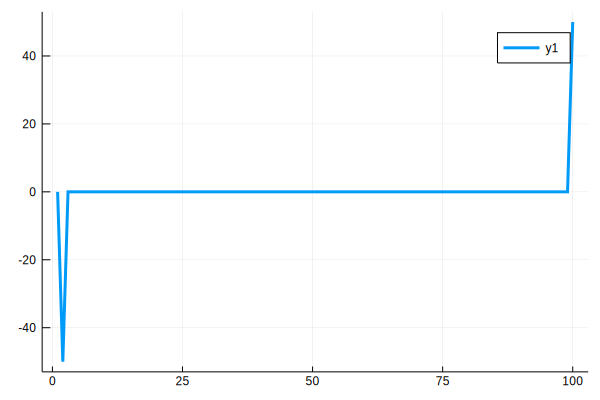

In [3]:
fs = sin.(x);
fs_hat = fft(fs);
plot(imag(fs_hat), lw=3)

接著我們計算 $y = \cos(x)$ 的傅立葉係數。
1. 先求出 $\cos(x)$ 的值，並儲存在變數 fc 中。
2. 將 fc 轉成傅立葉係數，並儲存在 fc_hat 中。
3. 用 plot 指令畫出係數中實部的部分。

根據 Euler's formula，$\cos(\theta) = \frac{e^{i\theta} + e^{-i\theta}}{2} = \frac{1}{2}(ie^{i\theta} + ie^{-i\theta})$

再和離散傅立葉轉換的公式相對照，可得傅立葉係數 $\hat{f}_{1} = N/2$, $\hat{f}_{-1} = N/2$，其他係數為零。

最後將係數畫出來，我們用 real 指令畫出傅立葉係數的實部，會看到兩個峰值。

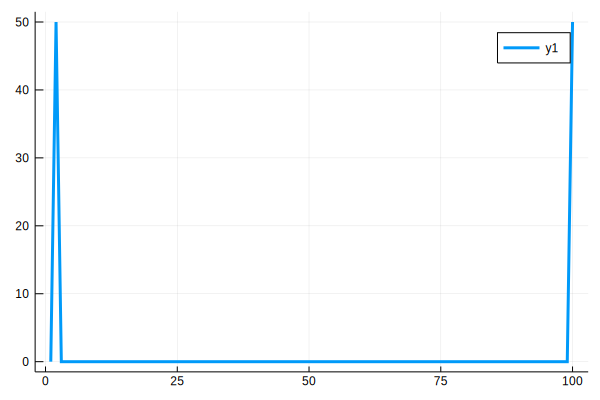

In [4]:
fc = cos.(x);
fc_hat = fft(fc);
plot(real(fc_hat), lw=3)

由上面兩個例子我們知道，

當 N 為偶數時，傅立葉係數的排序為 $\hat{f}_0, \hat{f}_1, \hat{f}_2, ...\hat{f}_{N/2 -1}, \hat{f}_{N/2}, \hat{f}_{-N/2 +1}, ..., \hat{f}_{-2}, \hat{f}_{-1}$.

當 N 為奇數時，傅立葉係數的排序為 $\hat{f}_0, \hat{f}_1, \hat{f}_2, ...\hat{f}_{(N-1)/2}, \hat{f}_{- (N-1)/2}, ..., \hat{f}_{-2}, \hat{f}_{-1}$.

### 一次微分與二次微分
當我們知道傅立葉係數的排法後，就可以利用傅立葉係數做函數的微分。因為點數為奇數或偶數，傅立葉係數排法會不同，因此微分的做法也有些不同。
詳細的理論推導請參考以下的文件，在這裡我們只演示幾個微分的例子。
https://math.mit.edu/~stevenj/fft-deriv.pdf?fbclid=IwAR2q8DNJ1avY1iBeJCbxC-qUlF_6CpBOVxZSmKeDOLdvEfhzNVn5aMJLVBc

1. 先介紹 N 為偶數時的一次微分：
假設我們已經有 $f(x)$ 的傅立葉係數 $\hat{f}_k$，則 

當 $ k \neq N/2$ 時，將 $\hat{f}_k$ 乘上 $\frac{2\pi i}{L} k$，其中 $L$ 為函數的週期

當 $ k = N/2 $ 時，將 $\hat{f}_{N/2}$ 乘上 $ 0 $

就可以得到微分後的傅立葉係數。

由於傅立葉係數取出來是一個向量，因此我們將上述微分的法則也寫成向量，運算比較方便。下列的例子我們取 $f(x) = \sin(x)$，$N = 20$ 試試。

(step 1) 先對微分的函數做 fft，取出傅立葉係數。

(step 2) 把傅立葉係數的編號排出來，並且在 $\hat{f}_{N/2}$ 的位置填 0。

$$ 0, 1, 2, ..., \frac{N}{2} -2, \frac{N}{2} -1, 0, -\frac{N}{2}+1, -\frac{N}{2} +2, ..., -2, -1$$

(step 3) 將傅立葉係數的編號乘上 $\frac{2\pi i}{L}$，其中函數週期 $L = 2 \pi $。就可以得到微分算子。

(step 4) 將傅立葉係數乘上微分算子，就可以得到微分後的傅立葉係數。最後再利用 ifft 轉回函數即可。

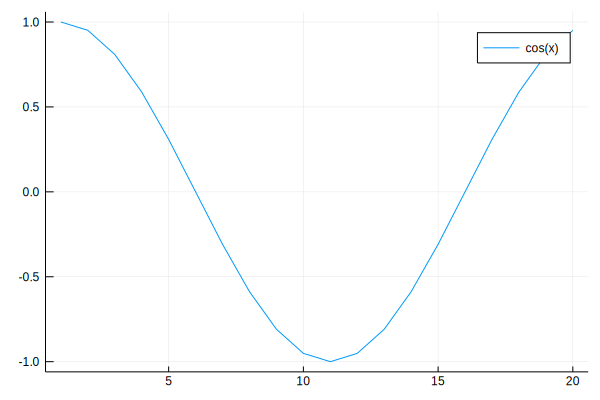

In [178]:
# (step 1)

N = 20; L = 2*pi;
x = range(0,stop=L,length=N+1);
x = x[1:N];
f = sin.(x);
f_hat = fft(f);

# (step 2)

k_mode_p= 0:N/2 -1;
nyquist = [0];
k_mode_n= -N/2 +1 :-1;
# oftype(nyquist,k_mode_p) 讓 nyquist 與 k_mode_p 有同樣資料型式，才能用 append!

diff1 = append!(oftype(nyquist,k_mode_p), nyquist);
diff1 = append!(diff1, k_mode_n);

# (step 3)

diff1 = (2*pi/L)*im*diff1;

# (step 4)

pf_hat = f_hat.*diff1;
pf = ifft(pf_hat);

plot(real(pf), label="cos(x)")

2. 介紹 N 為偶數時的二次微分：

需注意的是 "二次微分" 並不是 "一次微分" 做兩次

假設我們已經有 $f(x)$ 的傅立葉係數 $\hat{f}_k$，則將 $\hat{f}_k$ 乘上 $-(\frac{2\pi}{L} k)^2$ 就可以得到微分後的傅立葉係數，其中 $L$ 為函數的週期。

我們將上述二次微分的法則寫成向量，下列的例子我們取 $f(x) = \sin(x)$，$N = 20$。

(step 1) 先對微分的函數做 fft，取出傅立葉係數。

(step 2) 把傅立葉係數的編號排出來。
$$ 0, 1, 2, ..., \frac{N}{2} -2, \frac{N}{2} -1, \frac{N}{2}, -\frac{N}{2}+1, -\frac{N}{2} +2, ..., -2, -1$$

(step 3) 先將傅立葉係數的編號平方，再乘上 $-(\frac{2\pi}{L})^2$，其中函數週期 $L = 2 \pi $。就可以得到二次微分算子。

(step 4) 將傅立葉係數乘二次上微分算子，就可以得到二次微分後的傅立葉係數。最後再利用 ifft 轉回函數即可。

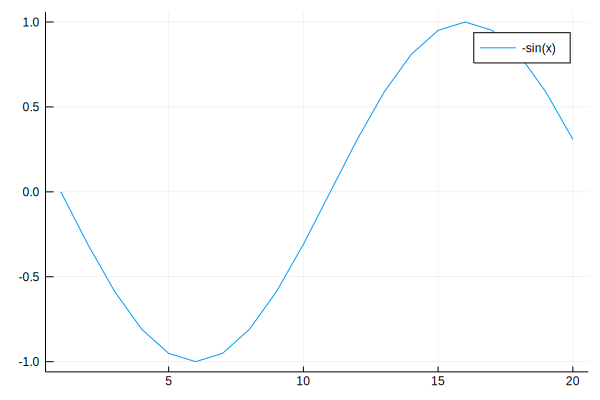

In [177]:
# (step 1)

N = 20; L = 2*pi;
x = range(0,stop=L,length=N+1);
x = x[1:N];
f = sin.(x);
f_hat = fft(f);

# (step 2)

k_mode_p= 1:N/2;
k_mode_n= -N/2 +1 :-1;
diff2 = append!([0],k_mode_p);
diff2 = append!(diff2, k_mode_n);

# (step 3)

diff2 = -(2*pi/L)^2*diff2.^2;

# (step 4)

ppf_hat = f_hat.*diff2;
ppf = ifft(ppf_hat);

plot(real(ppf), label="-sin(x)")

3. 介紹 N 為奇數時的一次微分：

假設我們已經有 $f(x)$ 的傅立葉係數 $\hat{f}_k$，則將 $\hat{f}_k$ 乘上 $\frac{2\pi i}{L} k $ 就可以得到微分後的傅立葉係數，其中 $L$ 為函數的週期。

我們將上述微分的法則寫成向量，運算比較方便。下列的例子我們取 $f(x) = \sin(x)$，$N = 19$ 試試。

(step 1) 先對微分的函數做 fft，取出傅立葉係數。

(step 2) 把傅立葉係數的編號排出來， $$ 0, 1, 2, ..., \frac{N-1}{2}, -\frac{N-1}{2}, -\frac{N-1}{2} +1, ..., -2, -1$$

(step 3) 將傅立葉係數的編號乘上 $\frac{2\pi i}{L}$，其中函數週期 $L = 2 \pi $。就可以得到微分算子。

(step 4) 將傅立葉係數乘上微分算子，就可以得到微分後的傅立葉係數。最後再利用 ifft 轉回函數即可。

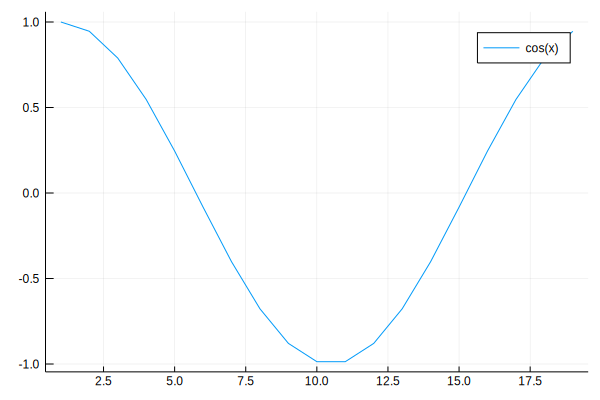

In [185]:
# (step 1)

N = 19; L = 2*pi;
x = range(0,stop=L,length=N+1);
x = x[1:N];
f = sin.(x);
f_hat = fft(f);

# (step 2)

k_mode_p= 1:(N-1)/2;
k_mode_n= -(N-1)/2 :-1;
diff1 = append!([0],k_mode_p);
diff1 = append!(diff1, k_mode_n);

# (step 3)

diff1 = (2*pi/L)*im*diff1;

# (step 4)

pf_hat = f_hat.*diff1;
pf = ifft(pf_hat);

plot(real(pf), label="cos(x)")

4. 介紹 N 為奇數時的二次微分：

假設我們已經有 $f(x)$ 的傅立葉係數 $\hat{f}_k$，則將 $\hat{f}_k$ 乘上 $-(\frac{2\pi }{L} k)^2 $ 就可以得到二次微分後的傅立葉係數，其中 $L$ 為函數的週期。

我們將上述微分的法則寫成向量，運算比較方便。下列的例子我們取 $f(x) = \sin(x)$，$N = 19$ 試試。

(step 1) 先對微分的函數做 fft，取出傅立葉係數。

(step 2) 把傅立葉係數的編號排出來， $$ 0, 1, 2, ..., \frac{N-1}{2}, -\frac{N-1}{2}, -\frac{N-1}{2} +1, ..., -2, -1$$

(step 3) 先將傅立葉係數的編號平方，再乘上 $-(\frac{2\pi }{L})^2$，其中函數週期 $L = 2 \pi $。就可以得到二次微分算子。

(step 4) 將傅立葉係數乘上二次微分算子，就可以得到二次微分後的傅立葉係數。最後再利用 ifft 轉回函數即可。

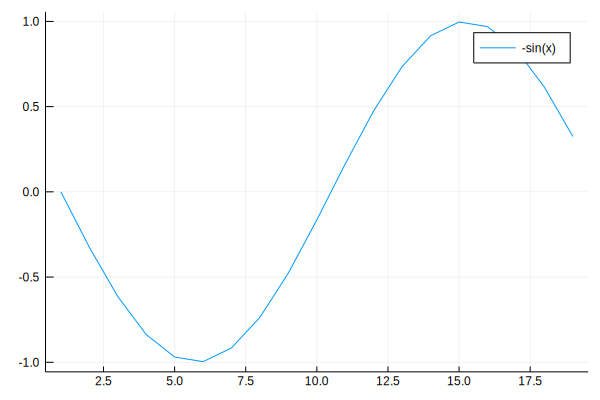

In [184]:
# (step 1)

N = 19; L = 2*pi;
x = range(0,stop=L,length=N+1);
x = x[1:N];
f = sin.(x);
f_hat = fft(f);

# (step 2)

k_mode_p= 1:(N-1)/2;
k_mode_n= -(N-1)/2 :-1;
diff2 = append!([0],k_mode_p);
diff2 = append!(diff2, k_mode_n);

# (step 3)

diff2 = -(2*pi/L)^2*diff2.^2;

# (step 4)

ppf_hat = f_hat.*diff2;
ppf = ifft(ppf_hat);

plot(real(ppf), label="-sin(x)")

## Section 2 - aliasing
假如我們試著畫出 $\sin(x) + \sin(9x)$ 的傅立葉係數，理論上應該要有四個非零的傅立葉係數, 但是會發現電腦只算出兩個非零的傅立葉係數, 如下圖, 這是為什麼呢?

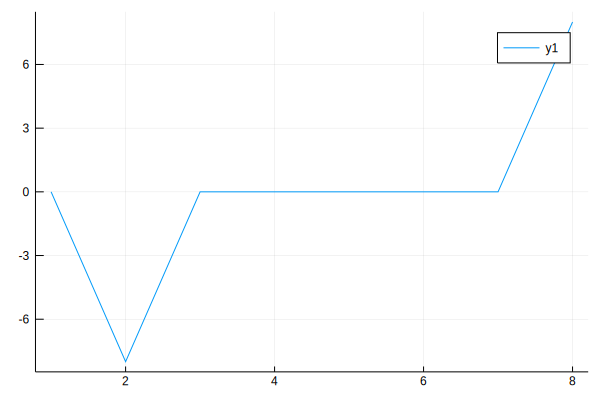

In [104]:
N=8;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
fss = sin.(x)+sin.(9*x);
fss_hat = fft(fss);
plot(imag(fss_hat))

我們將 $\sin(x)$ 與 $\sin(9x)$的圖形分別畫出來。

$\sin(9x)$ 的週期是 $2\pi / 9$，因此 x 只取 8 個點對他來說太少了，沒辦法準確畫出函數。

我們把 $\sin(9x)$ 與 $\sin(x)$ 畫在一起，當我們只取 8 個點時，會發現取在 $\sin(9x)$ 上的點剛好落在 $\sin(x)$ 上。我們取到的資料沒辦法描述 $\sin(9x)$ 中高頻率的部分。因此，上圖實際上畫出的是 $y = 2 \sin(x)$ 的傅立葉係數。

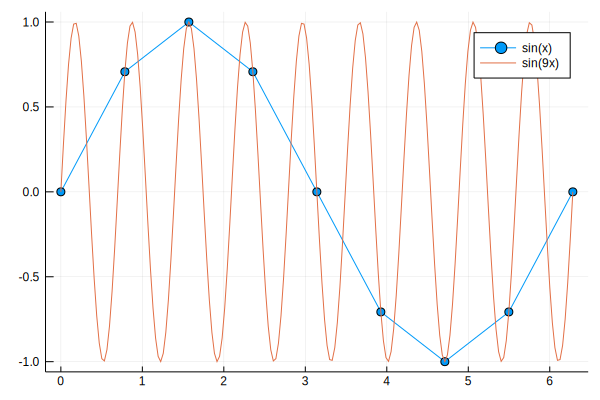

In [6]:
N=8;
x = range(0,stop=2*pi,length=N+1);
f = sin.(x);
p = plot(x,f,marker=:circle,label="sin(x)")
NN=200;
xx = range(0,stop=2*pi,length=NN+1);
g = sin.(9*xx);
plot!(p,xx,g,label="sin(9x)")

### Section 2.1 - zero-padding
我們想利用已知的函數 $f(x)$ 的傅立葉係數求 $f(x)^2$, 或更高次方的傅立葉係數。但直接將函數平方，會讓我們遇到一些問題，在次方小的時候用較少的傅立葉係數就可以表達一個函數，而在高次方時，需要更多的傅立葉係數。

當我們想求 $f(x) = \sin(3x)$ 的傅立葉係數時，根據 Euler's formula，
$$\sin(3\theta) = \frac{e^{3i\theta} - e^{-3i\theta}}{2i} = \frac{1}{2}(-ie^{3i\theta} + ie^{-3i\theta})$$
會算出兩個傅立葉係數，$\hat{f}_3$ 與 $\hat{f}_{-3}$。當我們取 N = 8 時，可以列出 $ k = 0, 1, 2, 3, 4, -3, -2, -1$ 的係數，因此 N = 8 在這個例子中是足夠的。

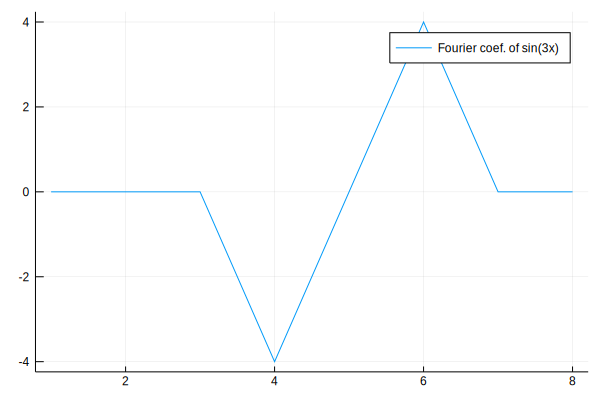

In [7]:
N=8;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
fss = sin.(3*x);
fss_hat = fft(fss);
plot(imag(fss_hat),label="Fourier coef. of sin(3x)")

但是，當我們想算 $g(x) = \sin(3x)^2$ 的傅立葉係數時，N = 8 卻是不夠的。下面這張圖列出的傅立葉係數是錯誤的。

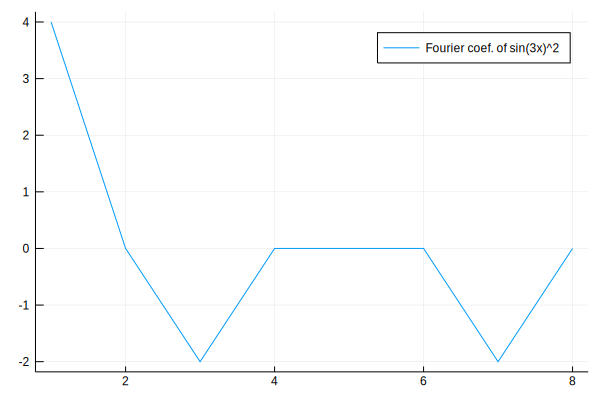

In [8]:
N=8;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
fss = (sin.(3*x)).^2;
fss_hat = fft(fss);
plot(real(fss_hat),label="Fourier coef. of sin(3x)^2")

我們把  $g(x) = \sin(3x)^2$ 利用倍角公式整理一下，
$$g(x) = \sin(3x)^2 = \frac{1-\cos(6x)}{2}.$$
這會算出$\hat{f}_0$，$\hat{f}_6$ 與 $\hat{f}_{-6}$ 的傅立葉係數，因此至少會需要令 N = 16。

底下兩張圖，我們分別畫出 $\sin(3x)^2$ 與 $\frac{1-\cos(6x)}{2}$ 的傅立葉係數，結果是一樣的。

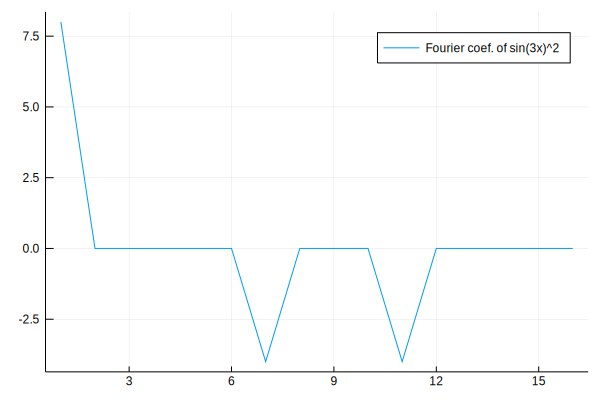

In [9]:
N=16;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
fss = (sin.(3*x)).^2;
fss_hat = fft(fss);
plot(real(fss_hat),label="Fourier coef. of sin(3x)^2")

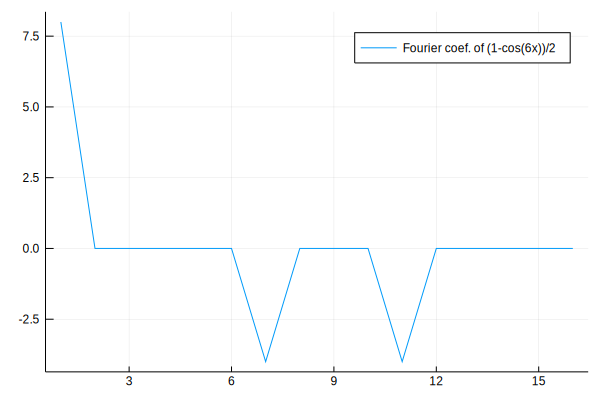

In [9]:
N=16;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
fss = (ones(N,1)-cos.(6*x))./2;
fss_hat = fft(fss);
plot(real(fss_hat),label="Fourier coef. of (1-cos(6x))/2")

要怎麼樣才能從 $f(x) = sin(3x)$ 的傅立葉係數得到 $g(x) = sin(3x)^2$ 的傅立葉係數呢? 我們可以依照下列步驟試試：

1. zero - padding  

由前面幾個例子我們知道傅立葉係數的排序為 $\hat{f}_0, \hat{f}_1, \hat{f}_2, ...\hat{f}_{N/2 -1}, \hat{f}_{N/2}, \hat{f}_{-N/2 +1}, ..., \hat{f}_{-2}, \hat{f}_{-1}$.

如果以 N = 8 的例子來看就是 $\hat{f}_0, \hat{f}_1, \hat{f}_2, \hat{f}_3, \hat{f}_4, \hat{f}_{-3}, \hat{f}_{-2}, \hat{f}_{-1}$。而其中，當 $f(x) = \sin(3x)$ 時，$\hat{f}_{-3}$ 與 $\hat{f}_{3}$ 有值，其餘為 0。 

根據 Euler's formula，當 $g(x) = \sin(3x)^2$ 會算出 $\hat{f}_0$，$\hat{f}_6$ 與 $\hat{f}_{-6}$ 的傅立葉係數。所以我們要在原來的傅立葉係數中高頻率部分插入 0 的傅立葉係數。

$\hat{f}_0, \hat{f}_1, \hat{f}_2, \hat{f}_3, \hat{f}_4, (\hat{f}_5, \hat{f}_6, \hat{f}_7, \hat{f}_8, \hat{f}_{-7}, \hat{f}_{-6}, \hat{f}_{-5}, \hat{f}_{-4}), \hat{f}_{-3}, \hat{f}_{-2}, \hat{f}_{-1}$

括號部分即為所插入的高頻傅立葉係數。使用 append! 插入零向量時，可用 typeof() 檢查兩個向量的形式是否相同。

在我們將傅立葉係數轉回函數之前要注意到，傅立葉係數的個數 N 已經從原來的 8 變成 16。係數個數變成兩倍，因此我們也要將 zero - padding 之後的係數乘以 2，這樣才能轉回正確的函數 $\sin(3x)$。

這是因為 ifft(fft(f)) 為 ${f}_{j} = \frac{1}{N} \sum_{k = -N/2 + 1}^{N/2} e^{i k x_j} \hat{f}_{k}$，這個指令的前面會除以傅立葉係數的個數 $\frac{1}{N}$，係數的個數變成兩倍，係數也要變成兩倍。

2. do ifft

接著，將新的傅立葉係數轉回函數 $\sin(3x)$，此時的 $\sin(3x)$ 函數會比原先的 $\sin(3x)$ 多出八個點。轉回去之後再將函數平方，得到 $g(x) = \sin(3x)^2$。

3. do fft

這時候，我們將 $g(x)$ 做傅立葉轉換，就可以得到我們預期的傅立葉係數。

fftw 的其他細節可參考下列文件
http://www.fftw.org/fftw3.pdf

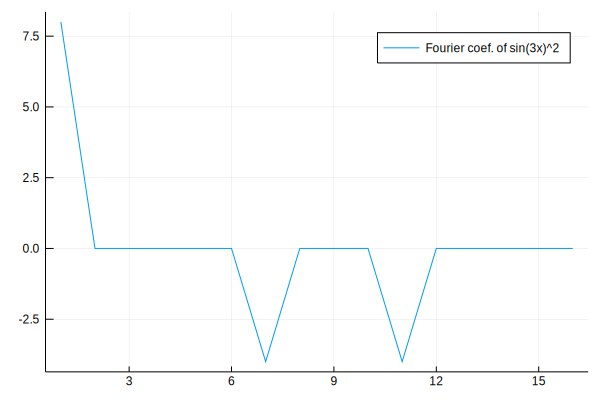

In [8]:
N=8;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
f = sin.(3*x);
f_hat = fft(f)

# 1. zeropadding
b = append!(f_hat[1:4], zeros(8)+zeros(8)*im);
c = append!(b,f_hat[5:8]);
c = 2*c;
#typeof(f_hat)  # DataType

# 2. do ifft，to obtain function sin(3x)
fs = ifft(c);
g = fs.^2;

# 3. do fft
g_hat = fft(g)
plot(real(g_hat),label="Fourier coef. of sin(3x)^2")


### Section 2.2 truncating (2/3-rule)
另一個克服 aliasing 的方法是 truncating。從上面的例子我們知道，當取點數太少時，函數的傅立葉係數沒辦法被準確的取出來，高頻的部分會干擾低頻的部分。因此 truncating 的方法，就是事先把頻率過高的傅立葉係數去掉，留下低頻的部分。

用簡單的例子看看，令 $f(x) = \sin(3x) = \frac{1}{2}(\hat{f}_{3}e^{3i\theta} + \hat{f}_{-3}e^{-3i\theta})$。如果我們取 N = 7，那就可以容納 $\hat{f}_{-3}, \hat{f}_{-2}, \hat{f}_{-1}, \hat{f}_{0}, \hat{f}_{1}, \hat{f}_{2}, \hat{f}_{3}$ 這麼多個傅立葉係數，剛好可以表示 $\sin(3x)$。

但是，如果我們將 $f(x)$ 平方，會得到 $g(x) = f^2(x) = \sin^2(3x) = \frac{1}{4}(\hat{f}_{3}e^{3i\theta} + \hat{f}_{-3}e^{-3i\theta})(\hat{f}_{3}e^{3i\theta} + \hat{f}_{-3}e^{-3i\theta}) = \frac{1}{4}(\hat{g}_{6}e^{(3+3)i\theta} + \hat{g}_{-6}e^{(-3-3)i\theta} + \hat{g}_{0})$。相乘後產生的高頻因為超過可容納的範圍，$\hat{g}_{6}e^{6i\theta}$ 就會疊加到 $\hat{g}_{-1}e^{-i\theta}$，而 $\hat{g}_{-6}e^{-6i\theta}$ 就會疊加到 $\hat{g}_{1}e^{i\theta}$，我們就會看到錯誤的頻率。

接著，我們討論要留下多少傅立葉係數。

    |--(要取零的部分)--|=================|--(要取零的部分)--|

$-N/2 ~~~~~~~~~~~~~~~~~~~~~~~~~~ -K ~~~~~~~~~~~~~ 0 ~~~~~~~~~~~~~ K ~~~~~~~~~~~~~~~~~~~~~~~~~~~ N/2$

1. 假設 $j,s \in [0, K]$，時函數相乘不會產生疊加 (aliasing) 現象。

2. 計算函數 $f(x)$ 的平方，我們令 ${f_1(x)} = \frac{1}{2 \pi} \sum_{j = -N/2 + 1}^{N/2} \hat{f}_{j} e^{i j x}$，${f_2(x)} = \frac{1}{2 \pi} \sum_{s = -N/2 + 1}^{N/2} \hat{f}_{s} e^{i s x}$，所以 $f^2(x) = f_1(x)f_2(x)$ 就會產生 $\hat{f}_{s+j} e^{i (s+j) x}$ 的高頻率。而 $s+j$ 的頻率會疊加到 $ s+j-N $ 的頻率。

3. 我們希望 $ s+j-N $ 這個疊加產生的頻率能落在要取零的區域裡。所以我們令 $ s+j-N < -K $

4. 取 $j = s = K$，則 $ s+j-N \leq K + K - N < -K $，整理不等式 $ K + K - N < -K $，得到 $ K < N/3$

所以我們令 $K = \frac{N}{3} = (\frac{2}{3})(\frac{N}{2})$

#### Example 1
在這個例子裡，$f(x) = \sin(x)$，$g(x) = f^2(x) = \sin^2(x) = \frac{1}{2} - \frac{1}{2}\cos(2x)$ 的傅立葉係數有 $\hat{g}_{0}$、$\hat{g}_{2}$ 和 $\hat{g}_{-2}$。

如果我們取 N = 7，那就可以容納 $\hat{g}_{-3}, \hat{g}_{-2}, \hat{g}_{-1}, \hat{g}_{0}, \hat{g}_{1}, \hat{g}_{2}, \hat{g}_{3}$ 這麼多個傅立葉係數。而我們算出來的傅立葉係數還在上面的範圍裡，因此算 $\sin(x)$ 的平方，不管有沒有做 truncating 都沒有問題。

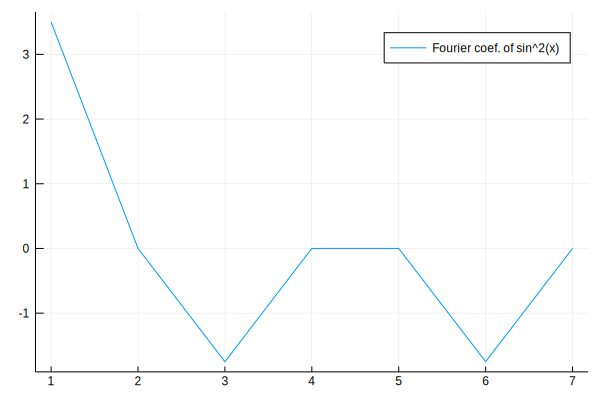

In [2]:
N=7;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
f = sin.(x);
f2 = f.^2;
f_hat = fft(f2)
plot(real(f_hat),label="Fourier coef. of sin^2(x)")

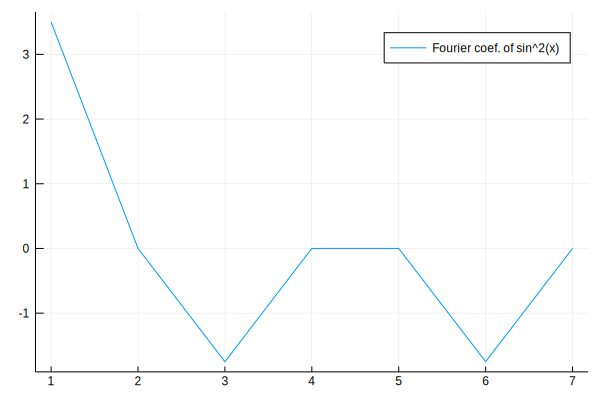

In [3]:
N=7;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
f = sin.(x);
f_hat = fft(f)

# 1
f_hat[4] = 0;
f_hat[5] = 0;

# 2
f_new = ifft(f_hat)

# 3
f2 = f_new.^2;
f2_hat = fft(f2)

plot(real(f2_hat),label="Fourier coef. of sin^2(x)")

#### Example 2
令 $f(x) = \sin(2x)$，則 $g(x) = f^2(x) = \sin^2(2x) = \frac{1}{2} - \frac{1}{2}\cos(4x)$，理論上會有 $\hat{g}_{0}$，$\hat{g}_{-4}$，$\hat{g}_{4}$。但我們卻算出 $\hat{g}_{0}$，$\hat{g}_{-3}$，$\hat{g}_{3}$，這是取點數過少產生的 aliasing。

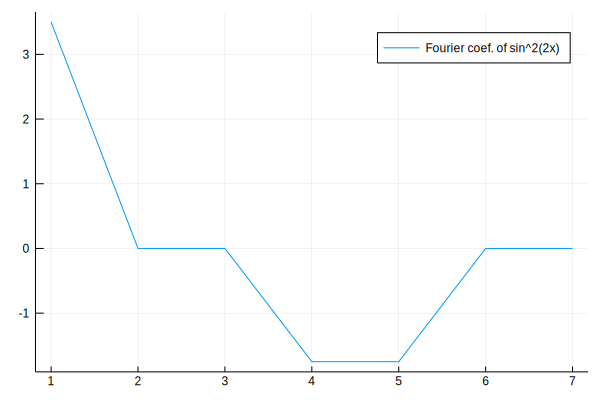

In [4]:
N=7;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
f = sin.(2x);
f2 = f.^2;
f_hat = fft(f2)
plot(real(f_hat),label="Fourier coef. of sin^2(2x)")

底下我們用 truncating (2/3-rule) 把錯誤的頻率去除。

當 N = 7，N/3 = 7/3，

所以我們將 $\hat{f}_{2}$，$\hat{f}_{-2}$，$\hat{f}_{3}$，$\hat{f}_{-3}$ 令為零。得到修改後的傅立葉係數 f_hat。

接著我們將傅立葉係數轉回函數 f_new，再將 f_new 平方。

將平方後的函數取傅立葉係數，就會發現 $\hat{g}_{-3}$，$\hat{g}_{3}$ 這兩個不該出現的傅立葉係數消失。但 $\hat{g}_{0}$ 也跟著消失，因為 $\hat{g}_{0}$ 是來自 $\hat{f}_{-2}$ 與 $\hat{f}_{2}$ 相乘。

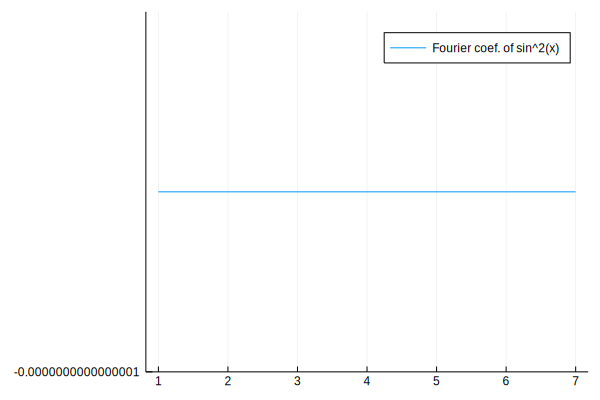

In [5]:
N=7;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
f = sin.(2x);
f_hat = fft(f)

# 1
f_hat[3] = 0;  # f_hat_2
f_hat[4] = 0;  # f_hat_3
f_hat[5] = 0;  # f_hat_-3
f_hat[6] = 0;  # f_hat_-2

# 2
f_new = ifft(f_hat)

# 3
g = f_new.^2;
g_hat = fft(g)

plot(real(g_hat),label="Fourier coef. of sin^2(x)")

#### Example 3
令 $f(x) = \sin(3x)$，則 $g(x) = f^2(x) = \sin^2(3x) = \frac{1}{2} - \frac{1}{2}\cos(6x)$，理論上會有 $\hat{g}_{0}$，$\hat{g}_{-6}$，$\hat{g}_{6}$。但我們卻算出 $\hat{g}_{0}$，$\hat{g}_{-1}$，$\hat{g}_{1}$。

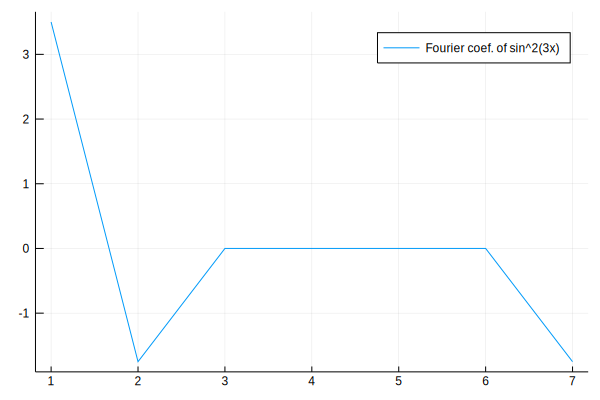

In [6]:
N=7;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
f = sin.(3x);
f2 = f.^2;
f_hat = fft(f2)
plot(real(f_hat),label="Fourier coef. of sin^2(3x)")

同樣的我們用 truncating (2/3-rule) 把錯誤的頻率去除。

當 N = 7，N/3 = 7/3，

所以我們將 $\hat{f}_{2}$，$\hat{f}_{-2}$，$\hat{f}_{3}$，$\hat{f}_{-3}$ 令為零。得到修改後的傅立葉係數 f_hat。

接著我們將傅立葉係數轉回函數 f_new，再將 f_new 平方。

將平方後的函數取傅立葉係數，就會發現 $\hat{g}_{-1}$，$\hat{g}_{1}$ 這兩個不該出現的傅立葉係數消失。但 $\hat{g}_{0}$ 也跟著消失，因為 $\hat{g}_{0}$ 是來自 $\hat{f}_{-3}$ 與 $\hat{f}_{3}$ 相乘。

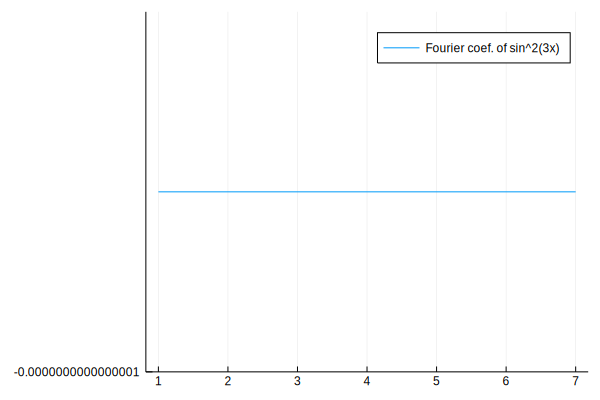

In [7]:
N=7;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
f = sin.(3x);
f_hat = fft(f)

# 1
f_hat[3] = 0;  # f_hat_2
f_hat[4] = 0;  # f_hat_3
f_hat[5] = 0;  # f_hat_-3
f_hat[6] = 0;  # f_hat_-2

# 2
f_new = ifft(f_hat)

# 3
f2 = f_new.^2;
f2_hat = fft(f2)

plot(real(f2_hat),label="Fourier coef. of sin^2(3x)")